<a name="lib"></a>

# Import libraries and packages yang dibutuhkan

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNVR.JK10.csv')
maindf = maindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
maindf

,date,open,high,low,close,adj_close,volume
0,2014-09-01,6400.0,6400.0,6290.0,6400.0,4831.672363,4193500
1,2014-09-02,6400.0,6420.0,6395.0,6400.0,4831.672363,2877000
2,2014-09-03,6400.0,6410.0,6320.0,6400.0,4831.672363,2102000
3,2014-09-04,6335.0,6410.0,6290.0,6335.0,4782.601563,5726500
4,2014-09-05,6365.0,6385.0,6295.0,6365.0,4805.249023,5397000
...,...,...,...,...,...,...,...
2473,2024-08-26,2350.0,2380.0,2330.0,2350.0,2350.000000,20397600
2474,2024-08-27,2350.0,2360.0,2250.0,2290.0,2290.000000,53066300
2475,2024-08-28,2290.0,2290.0,2240.0,2250.0,2250.000000,33915800
2476,2024-08-29,2250.0,2280.0,2240.0,2240.0,2240.000000,16896700


In [ ]:
print("Total number of days: ",maindf.shape[0])
print("Total number of fields: ",maindf.shape[1])

Total number of days:  2478
Total number of fields:  7


<a name="na"></a>

# Memeriksa nilai Null dan NA

In [ ]:
print("Null values:", maindf.isnull().values.sum())
print("NA values:", maindf.isna().values.any())

Null values: 0
NA values: False


<a name="predate"></a>

# Ubah kolom Tanggal ke format datetime format

In [ ]:
# convert date field from string to Date format
maindf['date'] = pd.to_datetime(maindf.date)
maindf.head()

,date,open,high,low,close,adj_close,volume
0,2014-09-01,6400.0,6400.0,6290.0,6400.0,4831.672363,4193500
1,2014-09-02,6400.0,6420.0,6395.0,6400.0,4831.672363,2877000
2,2014-09-03,6400.0,6410.0,6320.0,6400.0,4831.672363,2102000
3,2014-09-04,6335.0,6410.0,6290.0,6335.0,4782.601563,5726500
4,2014-09-05,6365.0,6385.0,6295.0,6365.0,4805.249023,5397000


<a name="eda"></a>

# EDA - Exploratory Data Analysis

In [ ]:
maindf.describe()

,date,open,high,low,close,adj_close,volume
count,2478,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2.478000e+03
mean,2019-08-15 04:34:52.009685248,7051.148103,7120.191687,6971.230831,7045.435835,5847.414251,1.379818e+07
min,2014-09-01 00:00:00,2240.000000,2280.000000,2240.000000,2240.000000,2240.000000,0.000000e+00
25%,2017-03-02 06:00:00,4730.000000,4780.000000,4660.000000,4730.000000,4306.775879,6.883725e+06
50%,2019-07-25 12:00:00,7800.000000,7900.000000,7725.000000,7800.000000,6273.522949,1.030280e+07
75%,2022-01-30 06:00:00,8900.000000,8980.000000,8813.750000,8900.000000,7184.879395,1.593940e+07
max,2024-08-30 00:00:00,11235.000000,11620.000000,11180.000000,11180.000000,9022.849609,2.509038e+08
std,NaN,2309.766927,2322.257663,2294.493144,2311.040516,1695.173204,1.445422e+07


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2478 non-null   datetime64[ns]
 1   open       2478 non-null   float64       
 2   high       2478 non-null   float64       
 3   low        2478 non-null   float64       
 4   close      2478 non-null   float64       
 5   adj_close  2478 non-null   float64       
 6   volume     2478 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.6 KB


<Axes: >

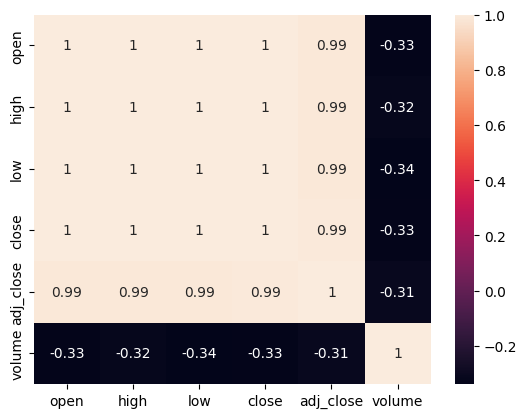

In [ ]:
import seaborn as sns
sns.heatmap(maindf.select_dtypes(include=['float64','int64']).corr(),annot=True)

<a name="dur"></a>

### Temukan durasi dataset

In [ ]:
print("Starting date: ",maindf.iloc[0][0])
print("Ending date: ", maindf.iloc[-1][0])
print("Duration: ", maindf.iloc[-1][0]-maindf.iloc[0][0])

Starting date:  2014-09-01 00:00:00
Ending date:  2024-08-30 00:00:00
Duration:  3651 days 00:00:00


<a name="oc"></a>

### Perbandingan Harga Saham Pembukaan dan Penutupan per Bulan

In [ ]:
monthvise= maindf.groupby(maindf['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,7108.069767,7101.651163
February,7138.969072,7131.469072
March,6955.778302,6946.863208
April,7175.695876,7172.783505
May,7223.229167,7222.786458
June,7156.004902,7146.519608
July,6904.783654,6890.985577
August,6743.247664,6742.780374
September,7192.216981,7187.264151


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

<a name="hl"></a>

### Harga saham tertinggi dan terendah per bulan

In [ ]:
maindf.groupby(maindf['date'].dt.strftime('%B'))['low'].min()
monthvise_high = maindf.groupby(maindf['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = maindf.groupby(maindf['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

<a name="trend"></a>

### Perbandingan tren antara harga pembukaan saham, harga penutupan, harga tertinggi, harga terendah

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(maindf, x=maindf.date, y=[maindf['open'], maindf['close'],
                                          maindf['high'], maindf['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<a name="sc"></a>
# Siapkan Harga Penutupan Saham

<a name="df"></a>

### Buat kerangka dataframe terpisah dari harga penutupan

In [ ]:
closedf = maindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2478, 2)


<a name="pclose"></a>

### Membuat grafik harga penutupan saham

In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="year"></a>

# Penggunaan hanya data 5 tahun terakhir untuk prediksi

In [ ]:
closedf = closedf[closedf['date'] > '2019-08-30']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1213


In [ ]:
closedf

,date,close
1265,2019-09-02,9590.0
1266,2019-09-03,9495.0
1267,2019-09-04,9515.0
1268,2019-09-05,9605.0
1269,2019-09-06,9410.0
...,...,...
2473,2024-08-26,2350.0
2474,2024-08-27,2290.0
2475,2024-08-28,2250.0
2476,2024-08-29,2240.0


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Stock close price', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="norm"></a>

### Normalisasi harga penutupan

In [ ]:
import random
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
# Menghapus kolom date dan normalisasi
del closedf['date']
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))

<a name="split"></a>

### Siapkan Data untuk pelatihan dan pengujian

In [ ]:
# Membagi data
training_size = int(len(closedf) * 0.80)
train_data, test_data = closedf[0:training_size], closedf[training_size:len(closedf)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (970, 1)
test_data:  (243, 1)


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# import os
# import random
# import tensorflow as tf

# # Set seed untuk reproducibility
# seed_value = 42
# os.environ['PYTHONHASHSEED'] = str(seed_value)
# np.random.seed(seed_value)
# random.seed(seed_value)
# tf.random.set_seed(seed_value)

# # Misalkan closedf sudah ada dengan kolom 'date' dan 'close'
# # closedf = maindf[['date', 'close']]

# # Menghapus kolom date dan normalisasi
# scaler = MinMaxScaler(feature_range=(0, 1))
# closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))

# # Membagi data
# training_size = int(len(closedf) * 0.80)
# train_data = closedf[0:training_size]
# test_data = closedf[training_size:len(closedf)]

# print("train_data: ", train_data.shape)
# print("test_data: ", test_data.shape)

# # Buat DataFrame untuk menampilkan hasil
# train_df = pd.DataFrame(train_data, columns=['Normalized Close'])
# test_df = pd.DataFrame(test_data, columns=['Normalized Close'])

# # Menyimpan DataFrame ke file Excel terpisah
# train_file = 'data_latih.xlsx'
# test_file = 'data_uji.xlsx'

# train_df.to_excel(train_file, index=False)
# test_df.to_excel(test_file, index=False)

# print(f'\nData Latih disimpan di {train_file}')
# print(f'Data Uji disimpan di {test_file}')

# # Verifikasi: Tampilkan beberapa baris dari masing-masing DataFrame
# print("\nData Latih (beberapa baris):")
# print(train_df.tail())

# print("\nData Uji (beberapa baris):")
# print(test_df.tail())

<a name="trans"></a>

### Transformasi harga penutupan berdasarkan kebutuhan peramalan analisis deret waktu

In [ ]:
# Fungsi untuk membuat dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

## Custom Timestemp
10, 20, 30

In [ ]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (949, 20)
y_train:  (949,)
X_test:  (222, 20)
y_test (222,)


In [ ]:
# Reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (949, 20, 1)
X_test:  (222, 20, 1)


<a name="gru"></a>

# Pembangungan Model
GRUs (Gated Recurrent Units) sangat mirip dengan Long Short Term Memory (LSTM). Sama seperti LSTM, GRU menggunakan gerbang untuk mengendalikan aliran informasi. GRU tergolong baru dibandingkan dengan LSTM. Inilah alasannya mengapa GRU menawarkan beberapa peningkatan dibandingkan LSTM dan memiliki arsitektur yang lebih sederhana..

### Custom Hyperparameter
Learning Rate:
0.01, 0.001, 0.0001 \
Epoch:
20, 50, 100 \
Batch Size:
8, 16, 32 \
Hidden State Size:
64, 128, 256

In [ ]:
# Inisialisasi hyperparameter
learning_rate = 0.001
epochs = 50
batch_size = 8
hidden_state = 64

In [ ]:
# model = Sequential()

# # Lapisan pertama GRU dengan dropout
# model.add(GRU(64, return_sequences=True, input_shape=(time_step, 1)))  # 1 fitur, misalnya harga penutupan
# model.add(Dropout(0.2))  # Dropout setelah GRU 1

# model.add(GRU(64, return_sequences=True, input_shape=(None, 4)))  # Misalnya, 4 fitur input
# model.add(Dropout(0.2))

# # Lapisan kedua GRU dengan dropout
# model.add(GRU(64, return_sequences=True))
# model.add(Dropout(0.2))

# # Lapisan ketiga GRU tanpa return_sequences karena ini adalah lapisan terakhir
# model.add(GRU(64))
# model.add(Dropout(0.2))

# # Lapisan Dense sebagai output (1 neuron untuk prediksi tunggal)
# model.add(Dense(1))

# # # Lapisan kedua GRU dengan dropout
# # model.add(GRU(64, return_sequences=True))
# # model.add(Dropout(0.2))  # Dropout setelah GRU 2

# # # Lapisan ketiga GRU dengan dropout
# # model.add(GRU(64, return_sequences=True))
# # model.add(Dropout(0.2))  # Dropout setelah GRU 3

# # # Lapisan keempat GRU dengan dropout
# # model.add(GRU(64, return_sequences=True))
# # model.add(Dropout(0.2))  # Dropout setelah GRU 4

# # # Lapisan kelima GRU dengan dropout
# # model.add(GRU(64))  # Tidak menggunakan 'return_sequences' karena ini lapisan terakhir GRU
# # model.add(Dropout(0.2))  # Dropout setelah GRU 5

# # # Lapisan Dense sebagai output
# # model.add(Dense(1))

In [ ]:
# Membangun model GRU
tf.keras.backend.clear_session()
model = Sequential()
model.add(GRU(hidden_state, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(hidden_state, return_sequences=True))
model.add(GRU(hidden_state))
model.add(Dropout(0.20))
model.add(Dense(1))

### Custom Adam
Beta1:0.8, **0.9**, 0.99 \
Beta2:0.99, **0.999**, 0.9999 \
Epsilon: 1e-8, **1e-7**, 1e-6

In [ ]:
# # Kompilasi model menggunakan RMSprop
# from tensorflow.keras.optimizers import RMSprop

# # Definisikan optimizer RMSprop
# optimizer = RMSprop(learning_rate=learning_rate)

# # Kompilasi model
# model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
# Kompilasi model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
# Melatih model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 0.0245 - val_loss: 3.2509e-04
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0027 - val_loss: 2.3566e-04
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0022 - val_loss: 2.3067e-04
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0019 - val_loss: 1.9971e-04
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0022 - val_loss: 2.0559e-04
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0017 - val_loss: 1.7267e-04
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0017 - val_loss: 1.9231e-04
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0017 - val_loss: 1.8896e-04
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0018 - val_loss: 1.7004e-04
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0016 - val_loss: 1.8911e-04
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0013 - val_loss: 2.0020e

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 20, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 20, 64)              │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,549 (736.52 KB)

 Trainable params: 62,849 (245.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 125,700 (491.02 KB)

<a name="loss"></a>

### Plotting loss chart

In [ ]:
# Visualisasi loss
fig = px.line(
    x=range(len(history.history['loss'])),
    y=[history.history['loss'], history.history['val_loss']],
    labels={'x': 'Epochs', 'y': 'Loss'},
    title='Training and Validation Loss'
)
fig.update_traces(name='Training Loss', selector=dict(mode='lines'))
fig.add_scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss')
fig.show()


In [ ]:
# Prediksi dan evaluasi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<a name="eval"></a>

# Evaluasi Model / Model Evaluation

In [ ]:
# Transformasi kembali ke bentuk asli
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

<a name="mse"></a>

### Metrik Evaluasi / Evaluation metrices RMSE, MSE and MAPE

In [ ]:
# Fungsi untuk menghitung metrik
def calculate_metrics(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mse, mape

train_rmse, train_mse, train_mape = calculate_metrics(original_ytrain, train_predict)
test_rmse, test_mse, test_mape = calculate_metrics(original_ytest, test_predict)

print("Train data RMSE: ", train_rmse)
print("Train data MSE: ", train_mse)
print("Train data MAPE: ", train_mape, "%")
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", test_rmse)
print("Test data MSE: ", test_mse)
print("Test data MAPE: ", test_mape, "%")

Train data RMSE:  141.26417506879156
Train data MSE:  19955.567157866193
Train data MAPE:  1.666754723233822 %
-------------------------------------------------------------------------------------
Test data RMSE:  71.5081406560127
Test data MSE:  5113.414180080095
Test data MAPE:  1.5940400352941146 %


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9931615253071128
Test data R2 score: 0.9761064165987368


<a name="cp"></a>

# Perbandingan harga penutupan saham asli dan harga penutupan prediksi / Comparison of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Harga Penutupan Sebenarnya','Peramalan Harga Penutupan (Data Latih)','Peramalan Harga Penutupan (Data Uji)'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Harga Penutupan Harian','date': 'Tanggal'})
fig.update_layout(title_text='Visualisasi Perbandingan Harga Penutupan Harian Sebenarnya dan Harga Penutupan Harian Peramalan ',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga Penutupan Harian')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1213, 1)
Test predicted data:  (1213, 1)


In [ ]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Misalnya Anda memiliki DataFrame 'close_stock' dan prediksi 'train_predict' serta 'test_predict'
# Shift train predictions untuk plotting
look_back = time_step
trainPredictPlot = np.empty_like(close_stock['close'])
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back] = train_predict.flatten()

# Shift test predictions untuk plotting
testPredictPlot = np.empty_like(close_stock['close'])
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(close_stock) - 1] = test_predict.flatten()

# Membuat DataFrame untuk tabel
table_df = pd.DataFrame({
    'Tanggal': close_stock['date'],
    'Nilai Sebenarnya': close_stock['close'],
    'Nilai Prediksi Latih': trainPredictPlot,
    'Nilai Prediksi Uji': testPredictPlot
})

# Menyimpan DataFrame ke file Excel
output_file = 'perbandingan_harga_penutupan.xlsx'
table_df.to_excel(output_file, index=False)

# Menampilkan tabel menggunakan Plotly
fig_table = ff.create_table(table_df)

# Kustomisasi tabel
fig_table.update_layout(
    title_text='Tabel Perbandingan Harga Penutupan Harian',
    font_size=15,
    font_color='black'
)

# Menampilkan tabel
fig_table.show()

print(f'Tabel disimpan ke {output_file}')

Tabel disimpan ke perbandingan_harga_penutupan.xlsx


<a name="days"></a>

# Memprediksi 30 hari ke depan / Predict next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


<a name="pdays"></a>

### Memplot 20 hari terakhir dari dataset dan prediksi 30 hari ke depan / Plotting the last 15 days of the dataset and predicting the next 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 20 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 20 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="pwhole"></a>

### Memplot seluruh Harga Saham Penutupan dengan periode prediksi 30 hari ke depan / Plotting whole stock price with prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Harga Penutupan Harian Saham'])

fig = px.line(lstmdf,labels={'value': 'Harga Penutupan Harian','index': 'Hari-Ke'})
fig.update_layout(title_text='Visualisasi Keseluruhan Harga Penutupan Harian Saham dengan Hasil Peramalan',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Keterangan')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Table Excel Plotting whole stock price with prediction

In [ ]:
import yfinance as yf

# Menentukan ticker dan periode
ticker = 'UNVR.JK'
start_date = '2014-09-01'
end_date = '2024-09-30'

# Mengambil data saham
data = yf.download(ticker, start=start_date, end=end_date)

# Menampilkan DataFrame
print(data)

[*********************100%***********************]  1 of 1 completed

              Open    High     Low   Close    Adj Close    Volume
Date                                                             
2014-09-01  6400.0  6400.0  6290.0  6400.0  4831.672363   4193500
2014-09-02  6400.0  6420.0  6395.0  6400.0  4831.672363   2877000
2014-09-03  6400.0  6410.0  6320.0  6400.0  4831.672363   2102000
2014-09-04  6335.0  6410.0  6290.0  6335.0  4782.599609   5726500
2014-09-05  6365.0  6385.0  6295.0  6365.0  4805.249023   5397000
...            ...     ...     ...     ...          ...       ...
2024-09-23  2190.0  2210.0  2170.0  2210.0  2210.000000  17520500
2024-09-24  2220.0  2270.0  2210.0  2260.0  2260.000000  25946800
2024-09-25  2260.0  2300.0  2240.0  2300.0  2300.000000  36252700
2024-09-26  2300.0  2310.0  2260.0  2300.0  2300.000000  24682000
2024-09-27  2310.0  2340.0  2270.0  2270.0  2270.000000  38117300

[2497 rows x 6 columns]
